In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

In [2]:
df = pd.read_csv('Zbior_danych_Titanic.csv')
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


### Od razu można zauważyć, że brakujące dane są oznaczone znakiem '?', co wpłynie na działanie funkcji isnull(). Dane trzeba będzie najpierw odpowiednio spreparować, żeby można było obliczyć ilość brakujących danych.

---

In [3]:
df.isnull().sum() 

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

### Ilość brakujących danych jest równa 0, dlatego że brakujące wartości są oznaczone znakiem "?" zamiast null/None

In [4]:
df.replace('?', None,inplace=True)
all_nan_data = df.isnull().sum()

print(all_nan_data)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Teraz wyświetla się poprawna ilość

---

In [5]:
all_nan_data_p = all_nan_data / 13.09

surv_nan_data = df[df['survived'] == 1].isnull().sum()
surv_nan_data_p = surv_nan_data / 5

n_surv_nan_data = df[df['survived'] == 0].isnull().sum()
n_surv_nan_data_p = n_surv_nan_data / 8.09

res = pd.DataFrame(
    [all_nan_data_p,surv_nan_data_p,n_surv_nan_data_p]
    ,index = ['All data','Survivors', 'Non-survivors']
).T
round(res)

,All data,Survivors,Non-survivors
pclass,0.0,0.0,0.0
survived,0.0,0.0,0.0
name,0.0,0.0,0.0
sex,0.0,0.0,0.0
age,20.0,15.0,23.0
sibsp,0.0,0.0,0.0
parch,0.0,0.0,0.0
ticket,0.0,0.0,0.0
fare,0.0,0.0,0.0
cabin,77.0,61.0,87.0


### "Procent brakujących danych w zależności od wartości zmiennej 'survived'

# Analiza powyższej tabeli
zmienna 'age' - dane częściowo zależne od zmiennej 'survived', można zaobserwować delikatnie większy procent dostępnych danych osób, które przeżyły katastrofę względem tych którzy nie przeżyli.

zmienna 'cabin' - sytuacja analogiczna jak w przypadku zmiennej 'age'.

zmienna 'embarked'- ilość brakujących danych tak niewielka, że ciężko wyznaczyć potencjalne zależności (lub nie) zmiennej.

zmienna 'boat' - brak tych danych nie jest brakiem, a informacją, że dana osoba nie wsiadła do łodzi ratunkowej, zatem zapewne jest ofiarą katastrofy.

zmienna 'body' - sytuacja podobna jak w przypadku zmiennej 'boat', dla osób które przeżyły wartość wynosi null, jednakże istnieją także duże braki w danych osób, które nie przeżyły.

zmienna 'home.dest' - dane częściowo zależne, tak jak w przypadku zmiennych 'age', oraz 'cabin'.


---

## Co warto zrobić z brakującymi danymi
Odpowiedź na to pytanie zależy od tego ile jest brakujących danych, jakiego typu są brakujące dane, oraz np. w przypadku danych liczbowych jaki jest rozkład dostępnych danych

### Age

In [6]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
age_clean = df['age'].dropna()

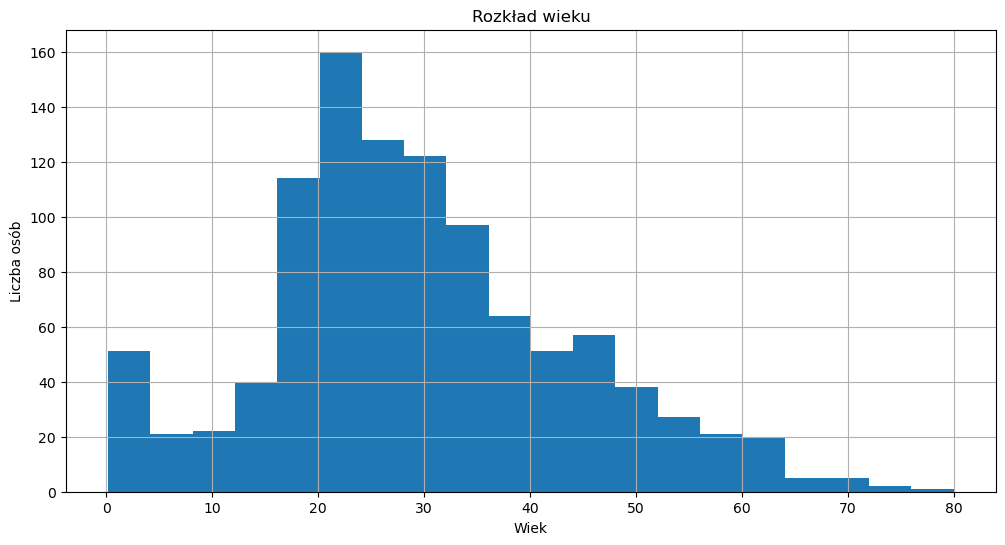

In [7]:
plt.figure(figsize=(12, 6)) 
age_clean.hist(bins=20)
plt.title('Rozkład wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba osób')
plt.show()

W zmiennej 'age' brakuje bardzo wiele danych, więc usuwanie wierszy zawierających niekompletne dane jest złym pomysłem. Na powyższym wykresie widać, że rozkład zmiennej 'age' jest niejednorodny, zatem sztuczne uzupełnienie danych np. średnią lub medianą z całych danych również nie jest dobrym rozwiązaniem. 

Najlepszym rozwiązaniem w tym przypadku byłoby pogrupowanie danych wg. innej zmiennej (np. 'sex', 'pclass') i następnie wyznaczenie wartości oczekiwanej danej grupy.

### Cabin

In [8]:
df['cabin'].value_counts()

cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49                1
F38                1
Name: count, Length: 186, dtype: int64

Zmienna 'cabin' stanowi wyzwanie ponieważ jak w poprzednim przypadku, usunięcie wierszy z brakującymi danymi znacznie uszczupli nasz zbiór danych (w tym przypadku stracimy prawie 80% danych). Z drugiej strony, patrząc na powyższe podsumowanie łatwo można zauważyć, że prawie każdy rekord ma inną wartość zmiennej 'cabin' przez co nie możemy wyznaczyć wartości dominującej. Jedynym sposobem na uzupełenienie danych jaki przychodzi mi do głowy byłoby uzupełnienie brakujących danych na podstawie wiedzy o kabinach - ich ilości, nazw i pojemności.

### Embarked

In [9]:
df['embarked'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

W zmiennej 'embarked' brakuje jedynie 2 rekordów, a więc usunięcie całych wierszy z brakującą wartością prawdopodobnie nie miałoby żadnych negatywnych konsekwencji. Drugą opcją byłoby uzupełnienie brakujących danych wartością występującą najczęściej, w tym przypadku jak widać na powyższym podsumowaniu jest to wartość 'S'.

### Boat/Body

Wartości None zmiennej 'boat' nie należy uzupełniać - jest to informacja, że dana osoba nie wsiadła do łodzi ratunkowej. Podobnie jest w przypadku zmiennej 'body', która oznacza numer odnalezionego ciała, jej brak w przypadku gdy zmienna 'survived' jest równa 1 jest oczywisty, a w przypadku przeciwnym jej uzupełnienie również nie ma sensu, ponieważ wartość None oznacza nieodnalezienie ciała.

### Home.dest

Zmienną 'home.dest' można uzupełnić wartością dominującą, jednakże w przypadku gdyby ta zmienna miała odgrywać znaczącą rolę mogłaby zaburzyć analizę lub budowę modelu. Lepszym rozwiązaniem byłoby sprawdzenie, czy istnieje jakaś zależność między tą, a innymi zmiennymi i na tej podstawie uzupełnić wartości.